# Réseau neuronal convolutif (CNN)

Cet exercice illustre la formation d'un réseau de neurones convolutifs (CNN) pour classer les images CIFAR. On utilise l'API séquentielle Keras. La création et la formation de votre modèle ne prendront que quelques lignes de code.

In [4]:
%pip install tensorflow setuptools matplotlib certifi

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import certifi
os.environ['SSL_CERT_FILE'] = certifi.where()

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Télécharger et préparer le jeu de données CIFAR10

L'ensemble de données CIFAR10 contient 60 000 images couleur dans 10 classes, avec 6 000 images dans chaque classe. L'ensemble de données est divisé en 50 000 images d'entraînement et 10 000 images de test. 

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
type(train_images)
train_images.shape
test_images.shape

(10000, 32, 32, 3)

### Vérifier les données

Pour vérifier que l'ensemble de données semble correct, traçons les 25 premières images de l'ensemble d'apprentissage et affichons le nom de la classe sous chaque image :

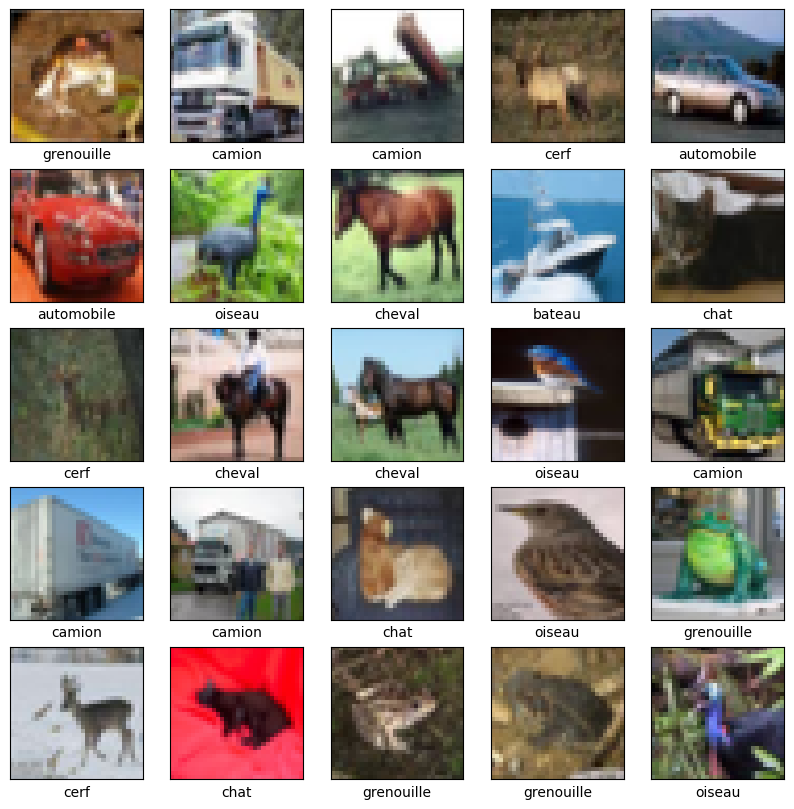

In [8]:
# Définir les noms des classes CIFAR-10
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Créer la base convolutive
Les 6 lignes de code ci-dessous définissent la base convolutive en utilisant un modèle commun : une pile de couches Conv2D et MaxPooling2D .

En entrée, un CNN prend des tenseurs de forme (image_height, image_width, color_channels), en ignorant la taille du lot. Si vous débutez avec ces dimensions, color_channels fait référence à (R,G,B). Dans cet exemple, vous allez configurer votre CNN pour traiter les entrées de forme (32, 32, 3), qui est le format des images CIFAR. Vous pouvez le faire en passant l'argument input_shape à votre première couche.

[Documentation de la classe Sequential](https://keras.io/api/models/sequential/)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Instructions**: Affichez l'architecture de votre modèle jusqu'à présent.
Utilisez pour cela la méthode `.summary()``


In [10]:
# Code ici
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Ajouter des couches denses sur le dessus
Pour compléter le modèle, vous allez alimenter le dernier tenseur de sortie de la base convolutive (de forme (4, 4, 64)) dans une couche dense pour effectuer la classification. 

Les couches denses prennent des vecteurs en entrée (qui sont 1D), tandis que la sortie actuelle est un tenseur 3D. 

* Tout d'abord, vous allez aplatir (ou dérouler) la sortie 3D en 1D, puis 
* ajouter un calques Dense par-dessus. 
* CIFAR a 10 classes de sortie, vous utilisez donc une couche Dense finale avec 10 sorties.

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Le résumé du réseau montre que (4, 4, 64) les sorties ont été aplaties en vecteurs de forme (1024) avant de passer par deux couches Dense.

### Compiler et entraîner le modèle

**Notes**

> [Documentation pour les fonctions de cout](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)

> Par défaut, la taille du Batch (i.e., nombre d'échantillons par mise-à-jour du gradient) est de 32 ([Model.fit(...)](https://keras.io/api/models/model_training_apis/)). 

Avec 50000 images d'entrainement (pour chaque Epoch), on met donc à jour les gradients 1563 fois.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3536 - loss: 1.7455 - val_accuracy: 0.5333 - val_loss: 1.2727
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5687 - loss: 1.2135 - val_accuracy: 0.6230 - val_loss: 1.0699
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6453 - loss: 1.0070 - val_accuracy: 0.6531 - val_loss: 1.0102
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6818 - loss: 0.9075 - val_accuracy: 0.6577 - val_loss: 0.9951
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7059 - loss: 0.8420 - val_accuracy: 0.6814 - val_loss: 0.9338
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7253 - loss: 0.7821 - val_accuracy: 0.6743 - val_loss: 0.9312
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7481 - loss: 0.7234 - val_accuracy: 0.6929 - val_loss: 0.9018
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7597 - loss:

### Évaluer le modèle

Visualisez l'évolution de l'Accuracy en fonction des Epoch

313/313 - 1s - 2ms/step - accuracy: 0.6959 - loss: 0.9866


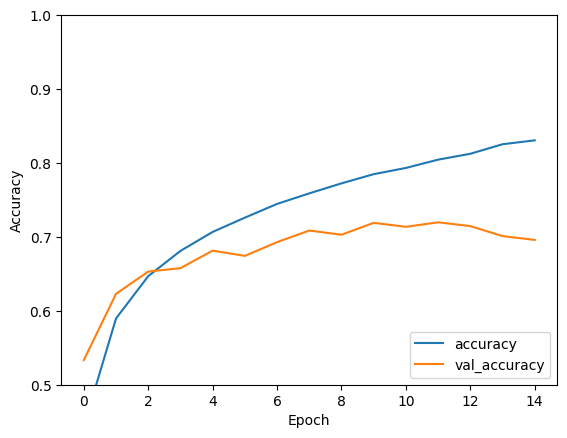

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

**Instructions**

Visualisez l'évolution de la foction de perte en fonction des Epoch

313/313 - 1s - 3ms/step - accuracy: 0.6959 - loss: 0.9866


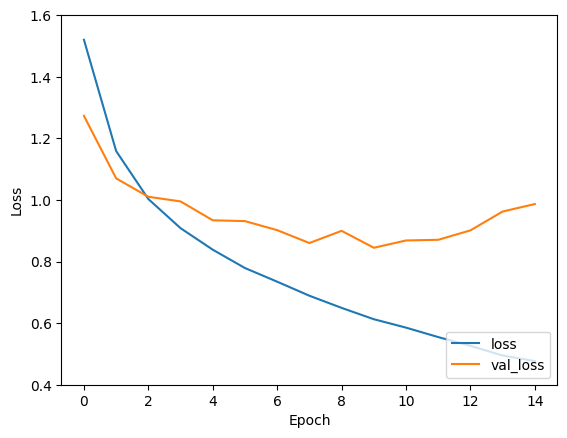

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.4, 1.6])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Analyse des Erreurs de Classification
#### Matrice de Confusion Multi-Classes

**Instruction**: Créer la [matrice de confusion multi-classes](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


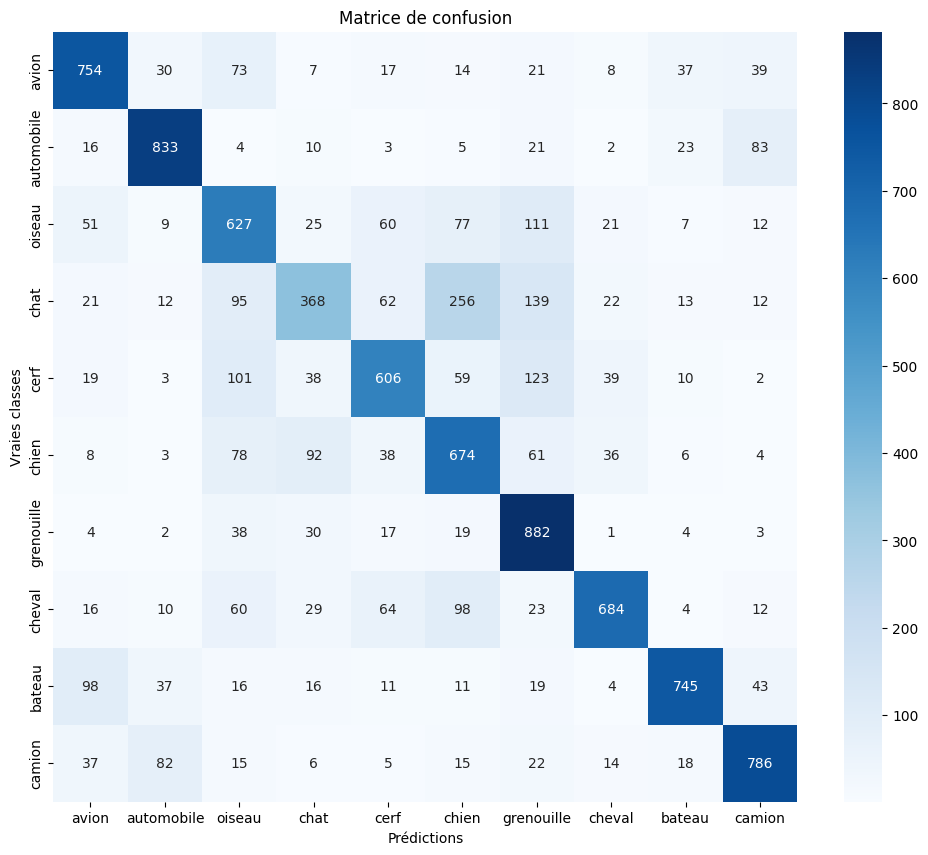

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

#Prédire les classes pour les images de test
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_labels.reshape(-1)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.title('Matrice de confusion')
plt.savefig('matrice_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

**Instruction:** Créez et affichez le [rapport de classification](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) incluant le Précision, le Rappel et le F1-Score pour chacune des 10 classes

Rapport de classification :

              precision    recall  f1-score   support

       avion       0.74      0.75      0.75      1000
  automobile       0.82      0.83      0.82      1000
      oiseau       0.57      0.63      0.60      1000
        chat       0.59      0.37      0.45      1000
        cerf       0.69      0.61      0.64      1000
       chien       0.55      0.67      0.61      1000
  grenouille       0.62      0.88      0.73      1000
      cheval       0.82      0.68      0.75      1000
      bateau       0.86      0.74      0.80      1000
      camion       0.79      0.79      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



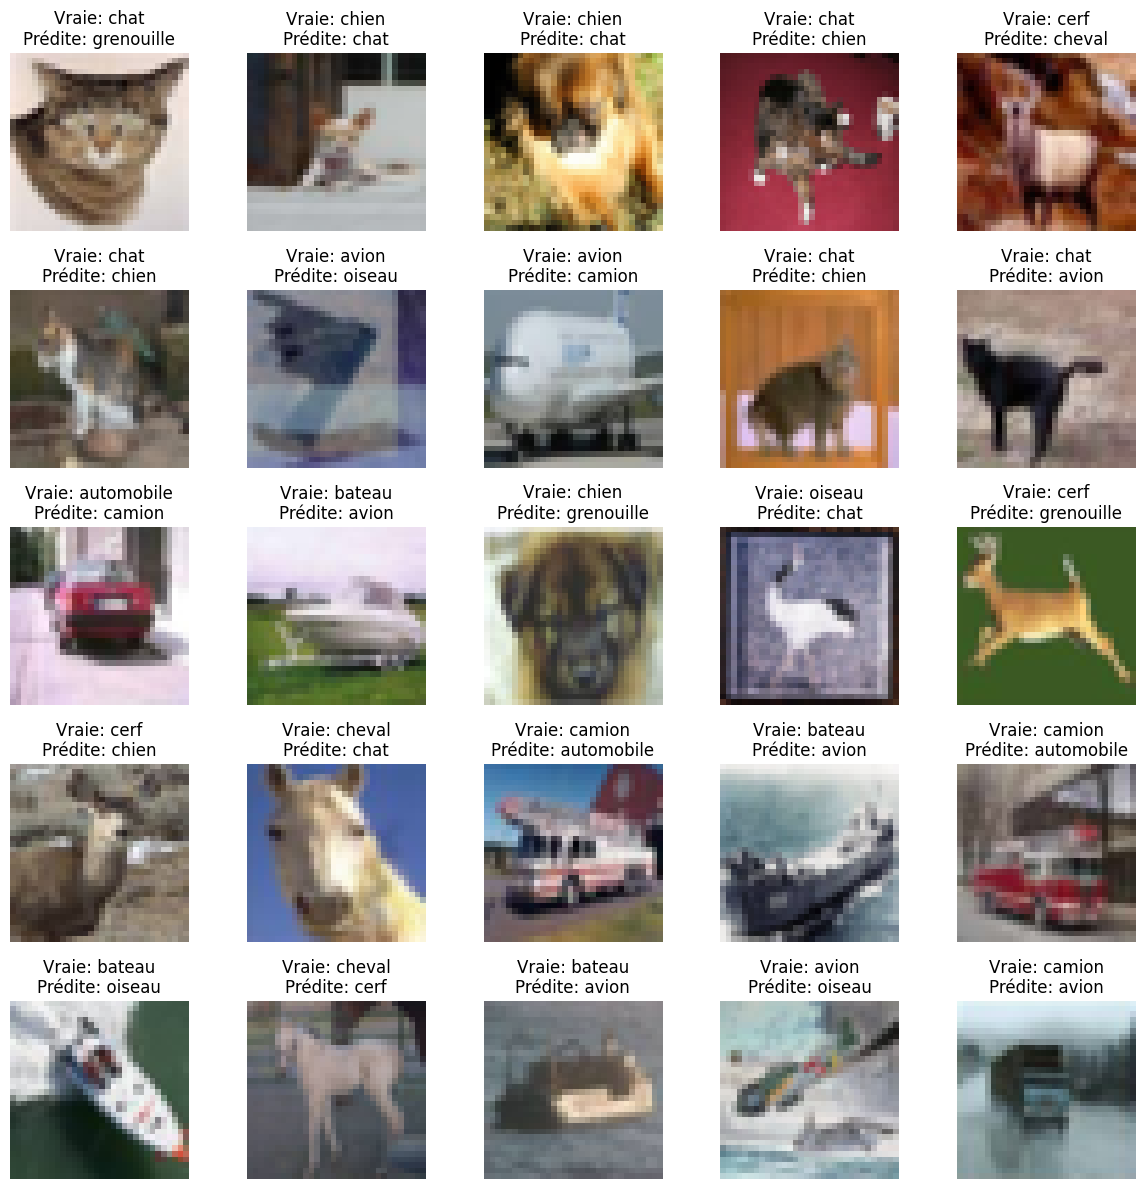

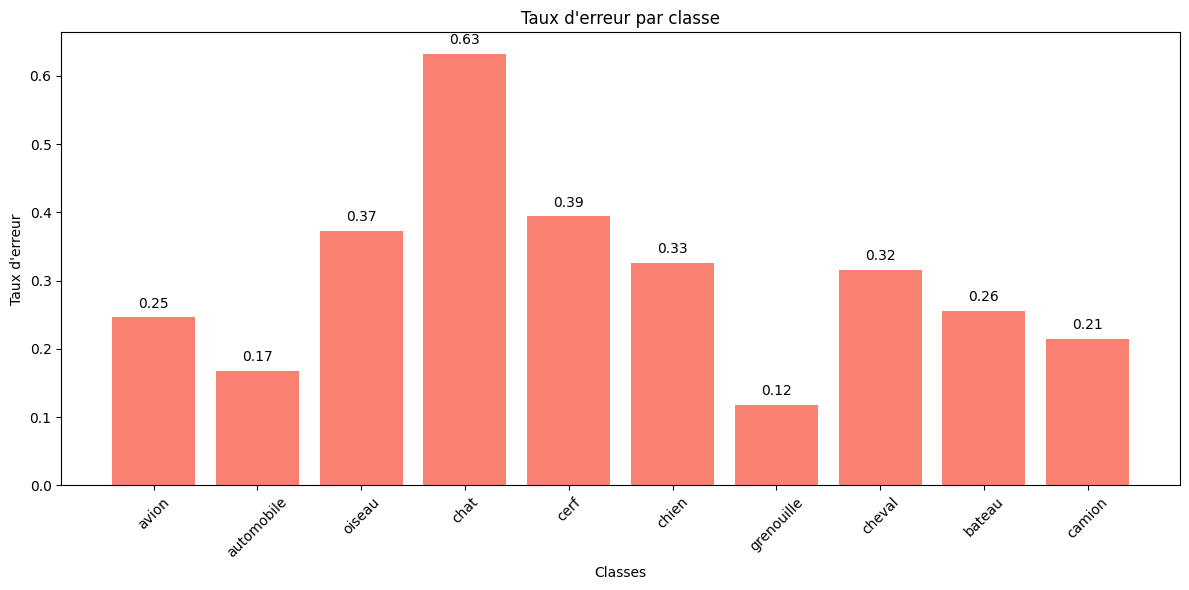


Les 10 confusions les plus fréquentes :
Vraie classe: chat, Prédite comme: chien, Nombre: 256
Vraie classe: chat, Prédite comme: grenouille, Nombre: 139
Vraie classe: cerf, Prédite comme: grenouille, Nombre: 123
Vraie classe: oiseau, Prédite comme: grenouille, Nombre: 111
Vraie classe: cerf, Prédite comme: oiseau, Nombre: 101
Vraie classe: cheval, Prédite comme: chien, Nombre: 98
Vraie classe: bateau, Prédite comme: avion, Nombre: 98
Vraie classe: chat, Prédite comme: oiseau, Nombre: 95
Vraie classe: chien, Prédite comme: chat, Nombre: 92
Vraie classe: automobile, Prédite comme: camion, Nombre: 83


In [17]:
# Afficher quelques métriques supplémentaires (Précision, Rappel, F1-score)
print("Rapport de classification :\n")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Analyser les erreurs de classification
# Identifier les exemples mal classés
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Sélectionner un échantillon aléatoire d'exemples mal classés
sample_size = min(25, len(misclassified_indices))
sample_indices = np.random.choice(misclassified_indices, sample_size, replace=False)

# Afficher les exemples mal classés
plt.figure(figsize=(12, 12))
for i, idx in enumerate(sample_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.title(f"Vraie: {class_names[true_classes[idx]]}\nPrédite: {class_names[predicted_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('erreurs_classification.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculer les taux d'erreur par classe
error_rates = []
for i in range(10):
    class_indices = np.where(true_classes == i)[0]
    class_errors = np.sum(predicted_classes[class_indices] != i)
    error_rate = class_errors / len(class_indices)
    error_rates.append(error_rate)

# Afficher les taux d'erreur par classe
plt.figure(figsize=(12, 6))
bars = plt.bar(class_names, error_rates, color='salmon')
plt.xlabel('Classes')
plt.ylabel('Taux d\'erreur')
plt.title('Taux d\'erreur par classe')
plt.xticks(rotation=45)

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('taux_erreur_par_classe.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyser les confusions les plus fréquentes
confusion_pairs = []
for i in range(10):
    for j in range(10):
        if i != j:
            confusion_pairs.append((i, j, conf_matrix[i, j]))

# Trier par nombre de confusions (du plus grand au plus petit)
confusion_pairs.sort(key=lambda x: x[2], reverse=True)

# Afficher les 10 confusions les plus fréquentes
print("\nLes 10 confusions les plus fréquentes :")
for true_class, pred_class, count in confusion_pairs[:10]:
    print(f"Vraie classe: {class_names[true_class]}, Prédite comme: {class_names[pred_class]}, Nombre: {count}")


### Améliorations techniques possibles
1. **Architecture plus profonde**: Ajout de couches supplémentaires pour capturer des caractéristiques plus complexes
2. **Dropout**: Désactive aléatoirement des neurones pour réduire le surapprentissage
3. **Augmentation de données**: Rotation, zoom, décalage et retournement horizontal pour améliorer la généralisation
4. **Optimisation des hyperparamètres**:
   - Taille de batch optimisée (64)
   - Taux d'apprentissage

## Références
[Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)

[Computer Vision - TenserFlow Tutorials](https://www.tensorflow.org/tutorials/images)